<a href="https://colab.research.google.com/github/Shosh3sb/computer_vision_512/blob/main/classification_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A. build a model and train datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/assignment 3 Cs512/Train",
                                                    target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/assignment 3 Cs512/validation",
                                                        target_size=(150,150), batch_size=20, class_mode='binary')

Found 3400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
from keras import layers
from keras import models
model =models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
from keras import optimizers
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(learning_rate =1e-4),
    metrics=['acc'])

In [ ]:
history =model.fit(
    train_generator,
    steps_per_epoch=130
,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/30
130/130 [==============================] - 18s 121ms/step - loss: 0.6897 - acc: 0.5192 - val_loss: 0.6756 - val_acc: 0.6083
Epoch 2/30
130/130 [==============================] - 15s 119ms/step - loss: 0.6589 - acc: 0.6085 - val_loss: 0.6367 - val_acc: 0.6217
Epoch 3/30
130/130 [==============================] - 16s 119ms/step - loss: 0.6304 - acc: 0.6404 - val_loss: 0.6109 - val_acc: 0.6717
Epoch 4/30
130/130 [==============================] - 15s 116ms/step - loss: 0.6005 - acc: 0.6619 - val_loss: 0.5872 - val_acc: 0.6967
Epoch 5/30
130/130 [==============================] - 15s 117ms/step - loss: 0.5720 - acc: 0.6996 - val_loss: 0.5610 - val_acc: 0.7133
Epoch 6/30
130/130 [==============================] - 15s 117ms/step - loss: 0.5451 - acc: 0.7277 - val_loss: 0.5476 - val_acc: 0.7183
Epoch 7/30
130/130 [==============================] - 17s 133ms/step - loss: 0.5210 - acc: 0.7442 - val_loss: 0.5476 - val_acc: 0.7150
Epoch 8/30
130/130 [==============================] - 1

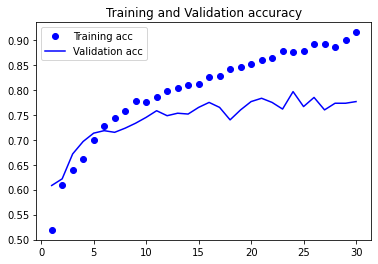

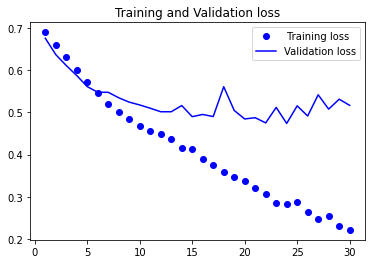

In [ ]:
import matplotlib.pyplot as plt
acc =history.history['acc']
val_acc =history.history['val_acc']
loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#plot accuracy
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

#plot loss
plt.figure()
plt.plot(epochs, loss, 'bo', label =' Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title("Training and Validation loss")
plt.legend()
plt.show()

B. use data agumentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Data augmentation
train_datagen = ImageDataGenerator(
     rescale=1./255, rotation_range= 40, width_shift_range= 0.2, height_shift_range= 0.2,
     shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/assignment 3 Cs512/Train",
                                                    target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/assignment 3 Cs512/validation",
                                                        target_size=(150,150), batch_size=20, class_mode='binary')

Found 3400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
from keras import layers
from keras import models
model =models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(learning_rate =1e-4),
    metrics=['acc'])

In [ ]:
history =model.fit(
    train_generator,
    steps_per_epoch=130
,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=30)


Epoch 1/30
130/130 [==============================] - 2253s 17s/step - loss: 0.6926 - acc: 0.5238 - val_loss: 0.6781 - val_acc: 0.5800
Epoch 2/30
 62/130 [=============>................] - ETA: 3:57 - loss: 0.6833 - acc: 0.5524

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


130/130 [==============================] - 432s 3s/step - loss: 0.6807 - acc: 0.5604 - val_loss: 0.6606 - val_acc: 0.5867
Epoch 3/30
130/130 [==============================] - 124s 953ms/step - loss: 0.6644 - acc: 0.5977 - val_loss: 0.6550 - val_acc: 0.6050
Epoch 4/30
130/130 [==============================] - 49s 378ms/step - loss: 0.6575 - acc: 0.6012 - val_loss: 0.6509 - val_acc: 0.5783
Epoch 5/30
130/130 [==============================] - 29s 220ms/step - loss: 0.6429 - acc: 0.6300 - val_loss: 0.6268 - val_acc: 0.6500
Epoch 6/30
130/130 [==============================] - 29s 222ms/step - loss: 0.6412 - acc: 0.6308 - val_loss: 0.6078 - val_acc: 0.6850
Epoch 7/30
130/130 [==============================] - 28s 216ms/step - loss: 0.6223 - acc: 0.6385 - val_loss: 0.5914 - val_acc: 0.7050
Epoch 8/30
130/130 [==============================] - 28s 215ms/step - loss: 0.6123 - acc: 0.6496 - val_loss: 0.5825 - val_acc: 0.6833
Epoch 9/30
130/130 [==============================] - 28s 214ms/ste

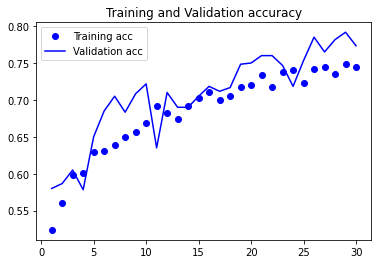

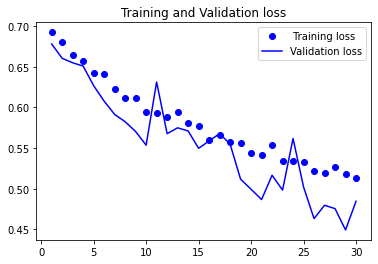

In [ ]:
import matplotlib.pyplot as plt
acc =history.history['acc']
val_acc =history.history['val_acc']
loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#plot accuracy
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

#plot loss
plt.figure()
plt.plot(epochs, loss, 'bo', label =' Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title("Training and Validation loss")
plt.legend()
plt.show()

C. VGG16 , here I tried to use VGG16 with 100 steps_per_epoch for trainig and the result was not good , so I tried another time below for 30 time or len(traing_generator) and I got better result

In [ ]:
#load VGG16
from keras.applications import VGG16
conv_base= VGG16(
    weights = 'imagenet',
    include_top=False,
    input_shape=(150, 150, 3))
conv_base.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
#load the model
from keras import models
from keras import layers
model= models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation= 'relu'))
model.add(layers.Dense(1,activation= 'relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#freez
conv_base.trainable = False
print('number of weight tensors after freezing the conv base:',len(model.trainable_weights))

number of weight tensors after freezing the conv base: 4


In [ ]:
# compile network:
from keras import optimizers
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(learning_rate =1e-4),
    metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Data augmentation
train_datagen = ImageDataGenerator(
     rescale=1./255, rotation_range= 40, width_shift_range= 0.2, height_shift_range= 0.2,
     shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/assignment 3 Cs512/Train",
                                                    target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/assignment 3 Cs512/validation",
                                                        target_size=(150,150), batch_size=20, class_mode='binary')


Found 3400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
history =model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,

    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/30
100/100 [==============================] - 31s 280ms/step - loss: 7.4582 - acc: 0.5125 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 25s 250ms/step - loss: 7.5428 - acc: 0.5110 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 26s 264ms/step - loss: 7.5274 - acc: 0.5120 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 26s 263ms/step - loss: 7.6045 - acc: 0.5070 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 27s 266ms/step - loss: 7.8127 - acc: 0.4935 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 28s 284ms/step - loss: 7.8744 - acc: 0.4895 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 25s 251ms/step - loss: 7.4657 - acc: 0.5160 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 8/30
100/100 [==============================] - 2

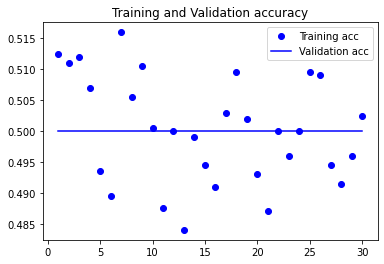

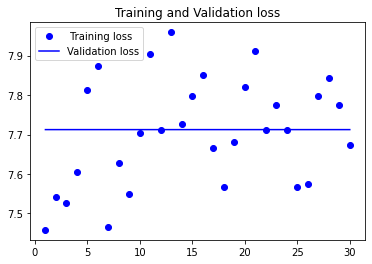

In [ ]:
import matplotlib.pyplot as plt
acc =history.history['acc']
val_acc =history.history['val_acc']
loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#plot accuracy
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

#plot loss
plt.figure()
plt.plot(epochs, loss, 'bo', label =' Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# fressing all ayers up to block5
conv_base.trianable= True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable= True
    if set_trainable:
        layer.trainable= True
    else:
        layer.trainable= False


In [ ]:
history =model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/30
100/100 [==============================] - 23s 231ms/step - loss: 7.5814 - acc: 0.5085 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 23s 234ms/step - loss: 7.6508 - acc: 0.5040 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 23s 232ms/step - loss: 7.6508 - acc: 0.5040 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 26s 257ms/step - loss: 7.7742 - acc: 0.4960 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 24s 240ms/step - loss: 7.6970 - acc: 0.5010 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 24s 243ms/step - loss: 7.8513 - acc: 0.4910 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 24s 242ms/step - loss: 7.8590 - acc: 0.4905 - val_loss: 7.7125 - val_acc: 0.5000
Epoch 8/30
100/100 [==============================] - 2

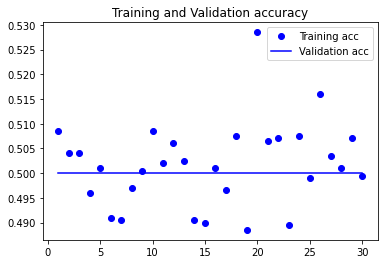

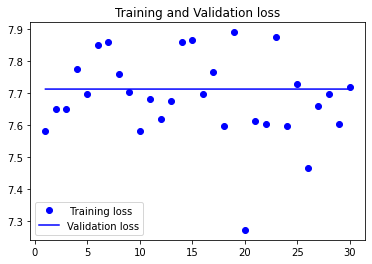

In [ ]:
import matplotlib.pyplot as plt
acc =history.history['acc']
val_acc =history.history['val_acc']
loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#plot accuracy
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

#plot loss
plt.figure()
plt.plot(epochs, loss, 'bo', label =' Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title("Training and Validation loss")
plt.legend()
plt.show()

VGG16.2 pre_trainging the second try to fix the problem that I got in the previuos model.

In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_augmentation= ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip= True,
)


In [ ]:
train_generator = train_augmentation.flow_from_directory(
    directory = "/content/drive/MyDrive/assignment 3 Cs512/Train",
    target_size=(128,128),
    batch_size=125,
    class_mode='binary')


Found 3400 images belonging to 2 classes.


In [ ]:
validation_augmentation= ImageDataGenerator(
    rescale=1./255
)


In [ ]:
validation_generator = validation_augmentation.flow_from_directory(
    directory = "/content/drive/MyDrive/assignment 3 Cs512/validation",
    target_size=(128,128),
    batch_size=125,
    class_mode='binary')

Found 600 images belonging to 2 classes.


In [ ]:
conv_base= VGG16(input_shape=(128,128,3),include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
for layer in conv_base.layers:
  layer.trainable =False

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history =model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

Epoch 1/30
21/28 [=====================>........] - ETA: 7s - loss: 0.3920 - accuracy: 0.8111

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


28/28 [==============================] - 33s 1s/step - loss: 0.3963 - accuracy: 0.8097 - val_loss: 0.3352 - val_accuracy: 0.8483
Epoch 2/30
28/28 [==============================] - 31s 1s/step - loss: 0.3806 - accuracy: 0.8229 - val_loss: 0.4901 - val_accuracy: 0.7850
Epoch 3/30
28/28 [==============================] - 30s 1s/step - loss: 0.3684 - accuracy: 0.8306 - val_loss: 0.4519 - val_accuracy: 0.7883
Epoch 4/30
28/28 [==============================] - 31s 1s/step - loss: 0.3527 - accuracy: 0.8400 - val_loss: 0.3169 - val_accuracy: 0.8667
Epoch 5/30
28/28 [==============================] - 33s 1s/step - loss: 0.3426 - accuracy: 0.8447 - val_loss: 0.3275 - val_accuracy: 0.8517
Epoch 6/30
28/28 [==============================] - 31s 1s/step - loss: 0.3325 - accuracy: 0.8465 - val_loss: 0.3844 - val_accuracy: 0.8317
Epoch 7/30
28/28 [==============================] - 30s 1s/step - loss: 0.3255 - accuracy: 0.8565 - val_loss: 0.3351 - val_accuracy: 0.8500
Epoch 8/30
28/28 [=============

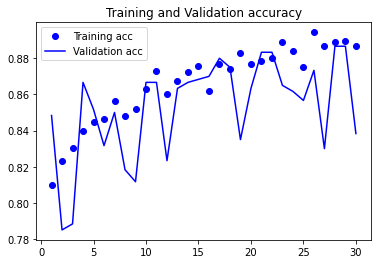

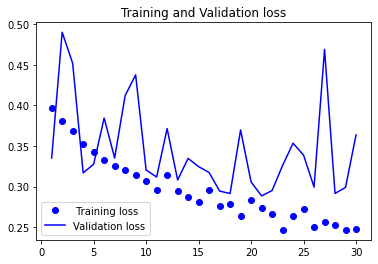

In [ ]:
import matplotlib.pyplot as plt
accuracy =history.history['accuracy']
val_accuracy =history.history['val_accuracy']
loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

#plot accuracy
plt.plot(epochs, accuracy, 'bo', label= 'Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

#plot loss
plt.figure()
plt.plot(epochs, loss, 'bo', label =' Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

Pre_trained_fine_running

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_augmentation= ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip= True,
)


In [ ]:
train_generator = train_augmentation.flow_from_directory(
    directory = "/content/drive/MyDrive/assignment 3 Cs512/Train",
    target_size=(128,128),
    batch_size=125,
    class_mode='binary')


Found 3400 images belonging to 2 classes.


In [ ]:
validation_augmentation= ImageDataGenerator(
    rescale=1./255
)


In [ ]:
validation_generator = validation_augmentation.flow_from_directory(
    directory = "/content/drive/MyDrive/assignment 3 Cs512/validation",
    target_size=(128,128),
    batch_size=125,
    class_mode='binary')

Found 600 images belonging to 2 classes.


In [ ]:
conv_base= VGG16(input_shape=(128,128,3),include_top=False,weights='imagenet')

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = True
set_trainable= False

for layer in conv_base.layers:
  if layer.name =='block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history =model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

Epoch 1/30
 9/28 [========>.....................] - ETA: 16s - loss: 33.0363 - accuracy: 0.5067

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


28/28 [==============================] - 33s 1s/step - loss: 11.3966 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
28/28 [==============================] - 30s 1s/step - loss: 0.6992 - accuracy: 0.5062 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 3/30
28/28 [==============================] - 30s 1s/step - loss: 0.6932 - accuracy: 0.4959 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 4/30
28/28 [==============================] - 30s 1s/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/30
28/28 [==============================] - 30s 1s/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/30
28/28 [==============================] - 32s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/30
28/28 [==============================] - 32s 1s/step - loss: 0.6932 - accuracy: 0.4953 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/30
28/28 [============

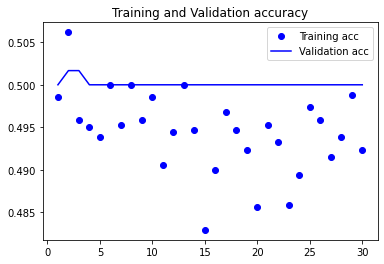

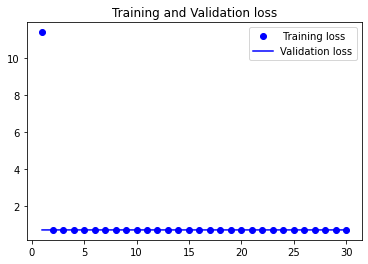

In [ ]:
import matplotlib.pyplot as plt
accuracy =history.history['accuracy']
val_accuracy =history.history['val_accuracy']
loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

#plot accuracy
plt.plot(epochs, accuracy, 'bo', label= 'Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

#plot loss
plt.figure()
plt.plot(epochs, loss, 'bo', label =' Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title("Training and Validation loss")
plt.legend()
plt.show()